In [197]:
import pandas as pd

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context("paper")

In [199]:
data=pd.read_csv("skyscraperdata.csv")

In [200]:
t = (
    data.query("Started!='-'")
    .assign(HPY=lambda x: x.HPY.str.replace(",", ".").astype(float))
    .assign(CY=lambda x: x["Construction Years"].str.replace(",", ".").astype(float))
    .assign(Started=lambda x: x["Started"].astype(int))
    .assign(Height=lambda x: x["Height (m)"].str.replace(",", ".").astype(float))
    .assign(Name=lambda x: x["Building Name"])
    .assign(FPY=lambda x: x.Floors / x.CY)[
        [
            "Name",
            "City",
            "Frame",
            "HPY",
            "Height",
            "Started",
            "CY",
            "Floors",
            "FPY",
            "Broad",
        ]
    ]
)

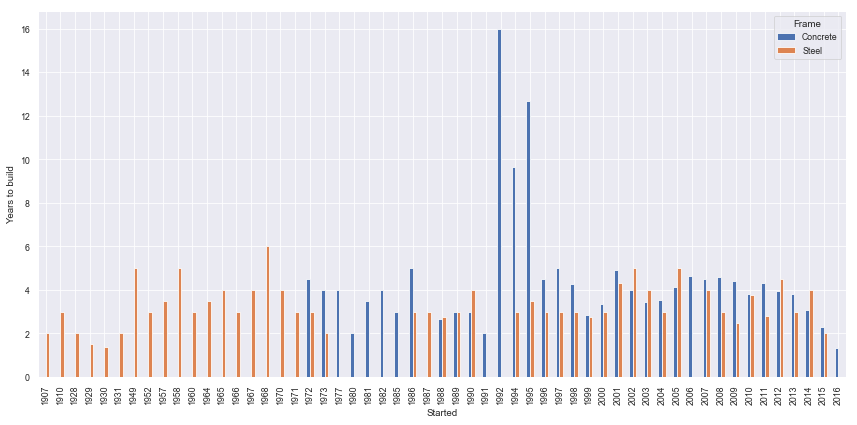

In [201]:
(
    t.query("Broad=='No'")
    .groupby(["Started", "Frame"])
    .CY.agg(["mean"])
    .unstack()["mean"]
    .plot.bar(figsize=(12, 6))
)
plt.ylabel("Years to build")
plt.tight_layout()
plt.savefig("ytb.png")

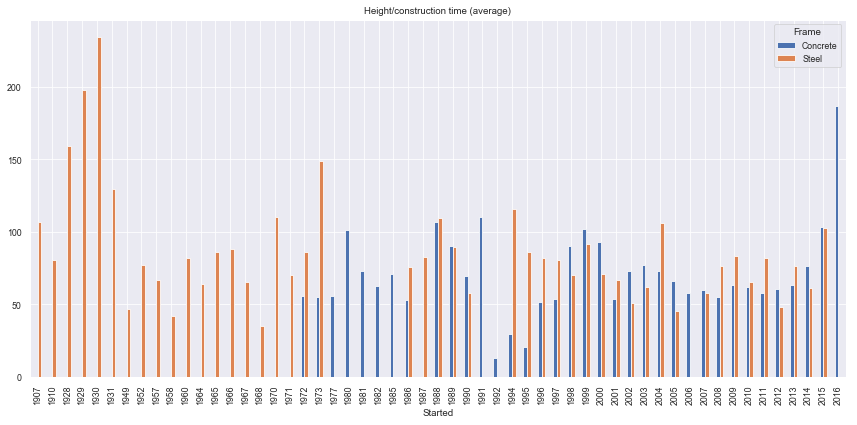

In [202]:
sns.set_context("paper")
(
    t.query("Broad=='No'")
    .groupby(["Started", "Frame"])
    .HPY.agg(["mean"])
    .unstack()["mean"]
    .plot.bar(figsize=(12, 6))
)
plt.title("Height/construction time (average)")
plt.tight_layout()
plt.savefig("mpy.png")

Text(0,0.5,'Height per year')

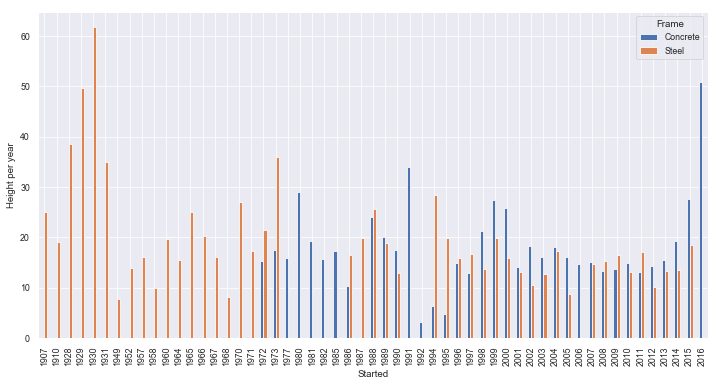

In [203]:
(
    t.query("Broad=='No'")
    .groupby(["Started", "Frame"])
    .FPY.agg(["mean"])
    .unstack()["mean"]
    .plot.bar(figsize=(12, 6))
)
plt.ylabel("Height per year")

In [204]:
(t.query("Started==2016"))

,Name,City,Frame,HPY,Height,Started,CY,Floors,FPY,Broad
1,Ryomyong Street Apartment Building,Pyongyang,Concrete,270.0,270.0,2016,1.0,82,82.0,No
2,Ryomyong Street 70-Storey Building,Pyongyang,Concrete,240.0,240.0,2016,1.0,70,70.0,No
3,Ryomyong Street 55-Storey Building,Pyongyang,Concrete,210.0,210.0,2016,1.0,55,55.0,No
4,Ryomyong Street 50-Storey Building,Pyongyang,Concrete,200.0,200.0,2016,1.0,50,50.0,No
15,ASHTON Chula-Silom,Bangkok,Concrete,101.9,203.8,2016,2.0,57,28.5,No
16,Das Intellitech Headquarters,Shenzhen,Concrete,100.0,200.0,2016,2.0,40,20.0,No


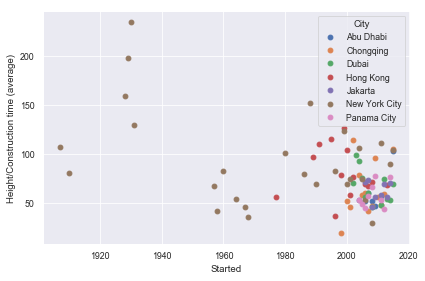

In [205]:
cities = t.groupby("City").count().Name.pipe(lambda x: x[x > 20]).index
(
    t.query("Broad=='No'")
    .query("City in @cities")
    .groupby(["City", "Started"])
    .HPY.mean()
    .unstack(level=0)
).plot(marker="o", linewidth=0)
plt.ylabel("Height/Construction time (average)")
plt.tight_layout()
plt.savefig("cities.png")

In [206]:
import seaborn as sns
sns.set()


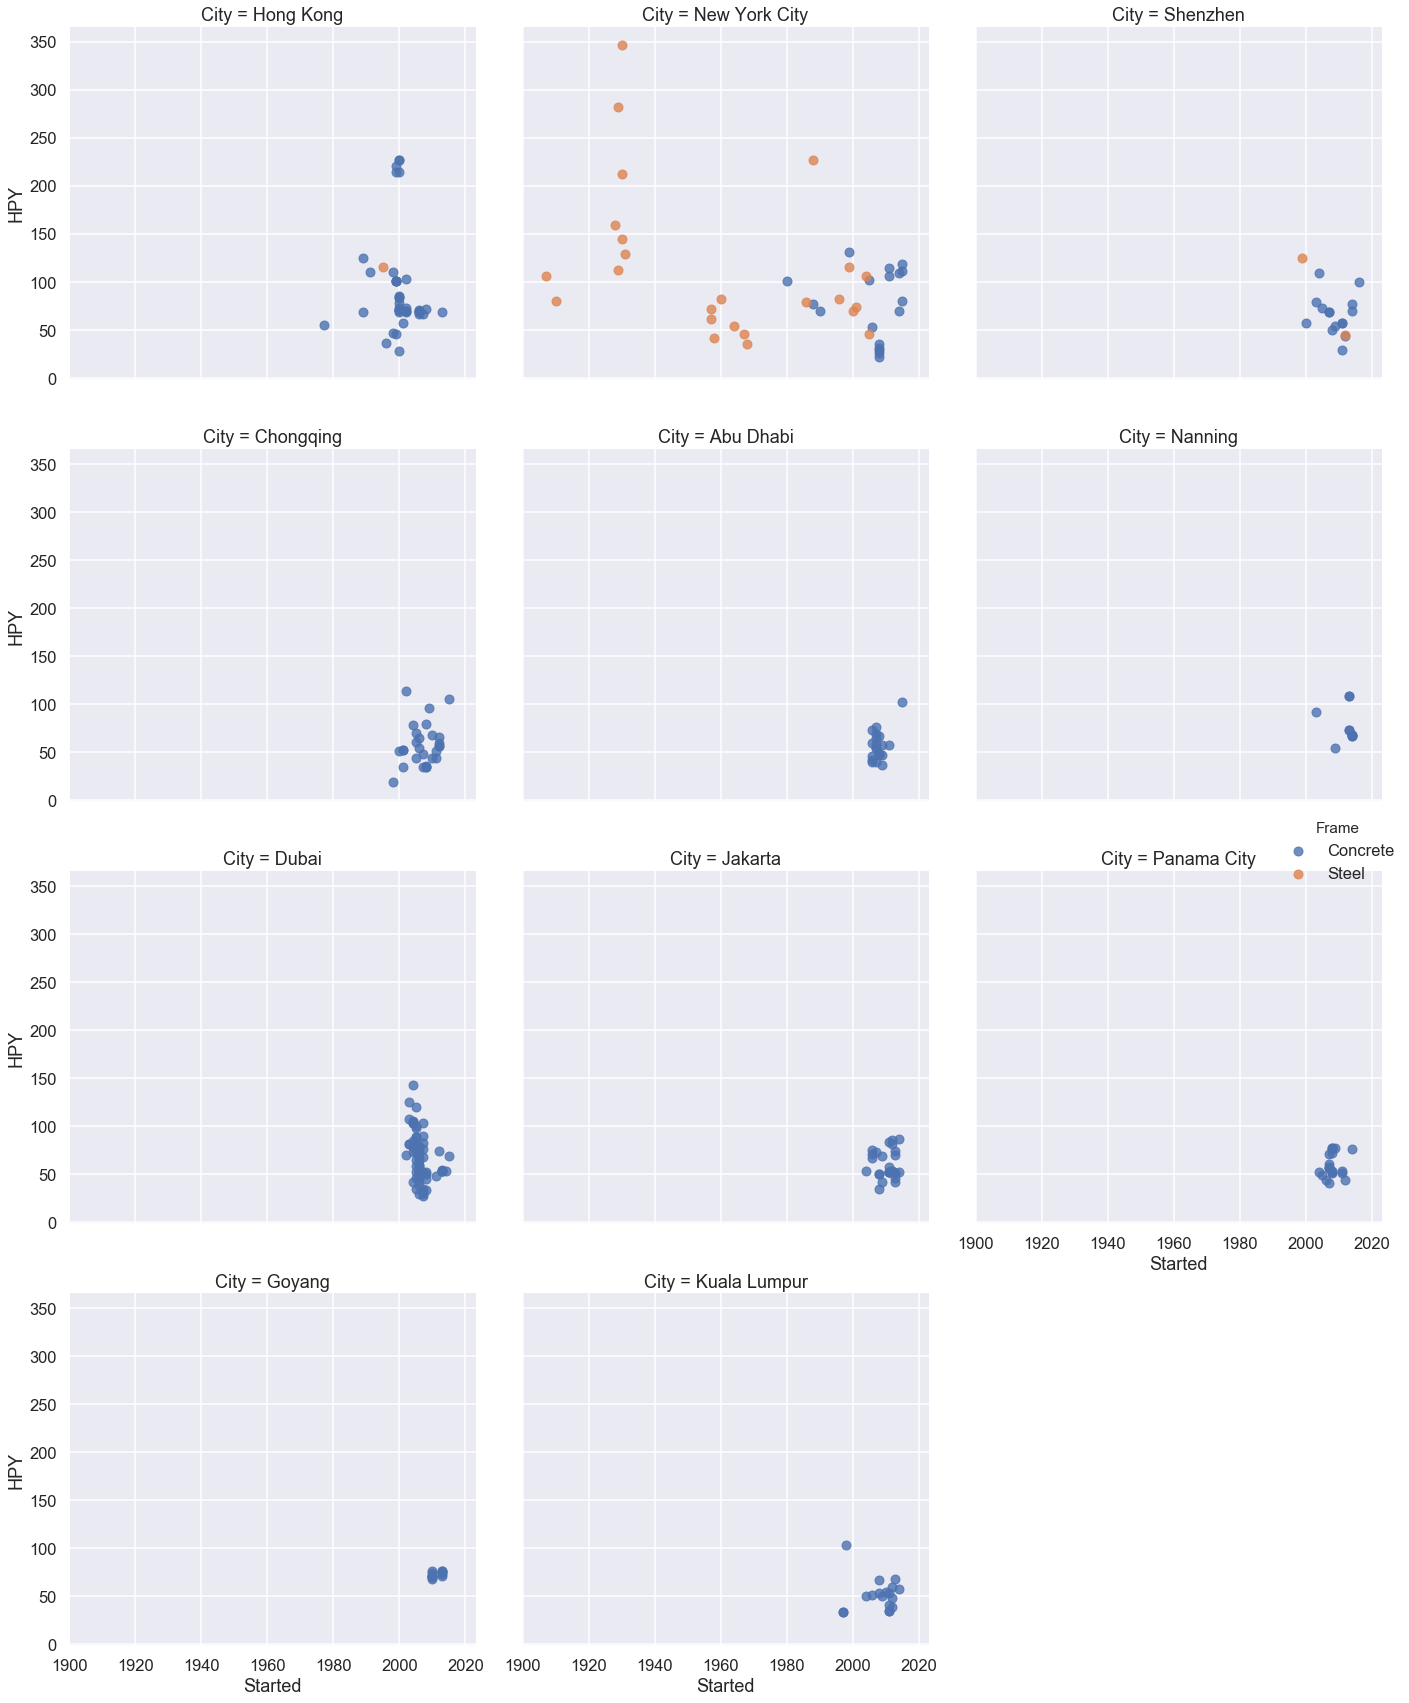

In [207]:
sns.set_context("talk")
cities = t.groupby("City").count().Name.pipe(lambda x: x[x > 20]).index
cities2 = (
    t.query("Started>2010").groupby("City").count().Name.pipe(lambda x: x[x > 5]).index
)
cities = set(cities) | set(cities2)
t2 = t.query("City in @cities").query("Broad=='No'")

g = sns.lmplot(
    x="Started",
    y="HPY",
    col="City",
    hue="Frame",
    data=t2,
    height=6,
    col_wrap=3,
    fit_reg=False,
)
plt.tight_layout()
plt.savefig("cities overtime.png")

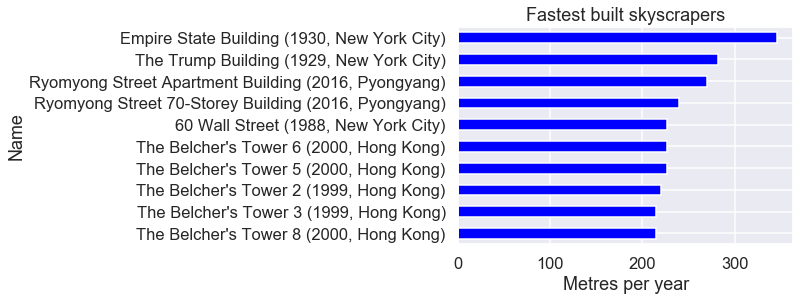

In [208]:
(
    t.query("Broad=='No'")
    .sort_values("HPY", ascending=False)
    .assign(Name=lambda x: x.Name + " (" + x.Started.astype(str) + ", " + x.City + ")")
    .set_index("Name")
    .HPY.head(10)
    .sort_values()
    .plot.barh(color="blue")
)
plt.xlabel("Metres per year")
plt.title("Fastest built skyscrapers")
plt.gcf().subplots_adjust()
plt.savefig("fastest.png")

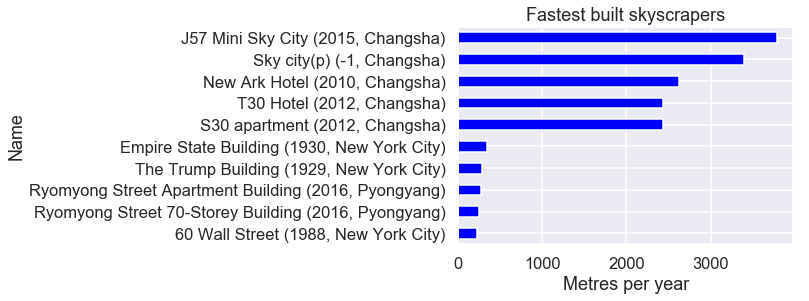

In [209]:
(
    t.sort_values("HPY", ascending=False)
    .assign(Name=lambda x: x.Name + " (" + x.Started.astype(str) + ", " + x.City + ")")
    .set_index("Name")
    .HPY.head(10)
    .sort_values()
    .plot.barh(color="blue")
)
plt.xlabel("Metres per year")
plt.title("Fastest built skyscrapers")
plt.gcf().subplots_adjust()
plt.savefig("fastest_broad.png")

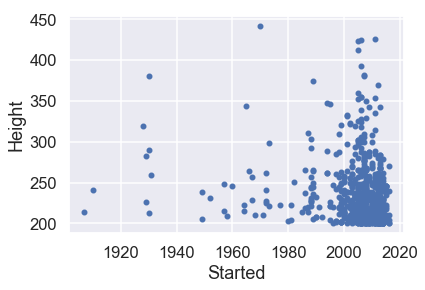

In [210]:
(t.query("Broad=='No'").plot.scatter("Started", "Height"))

(0, 500)

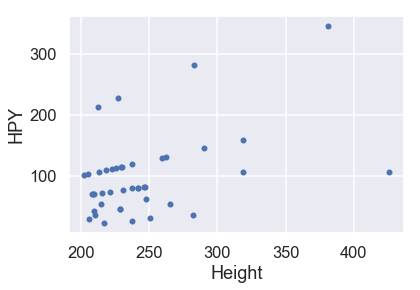

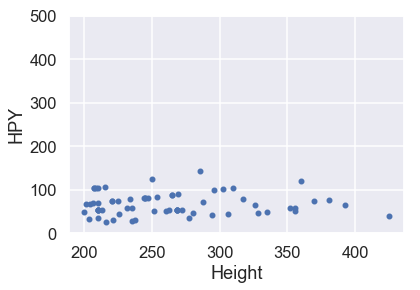

In [211]:
(t.query("City=='New York City'").plot.scatter("Height", "HPY"))
(t.query("City=='Dubai'").plot.scatter("Height", "HPY"))
plt.ylim([0, 500])

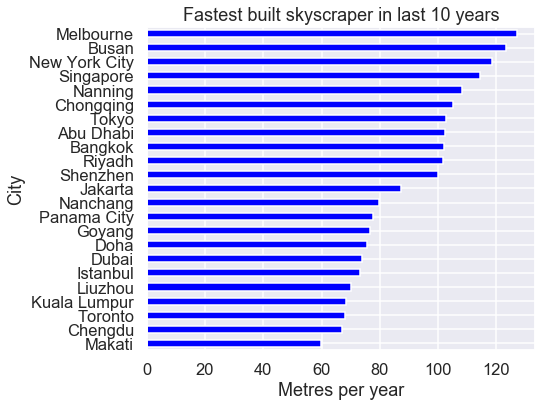

In [213]:
def tallest(g):
    return g.sort_values("HPY").assign(number=lambda x: len(x)).tail(1)


(
    t.query("Started>=2008")
    .query("City not in ['Changsha','Pyongyang']")
    .groupby("City")
    .apply(tallest)
    .query("number>4")
    .reset_index(drop=True)
    .sort_values("HPY", ascending=False)
    .set_index("City")
    .HPY.sort_values(ascending=True)
    .plot.barh(color="blue", figsize=(8, 6))
)
plt.title("Fastest built skyscraper in last 10 years")
plt.xlabel("Metres per year")
plt.tight_layout()

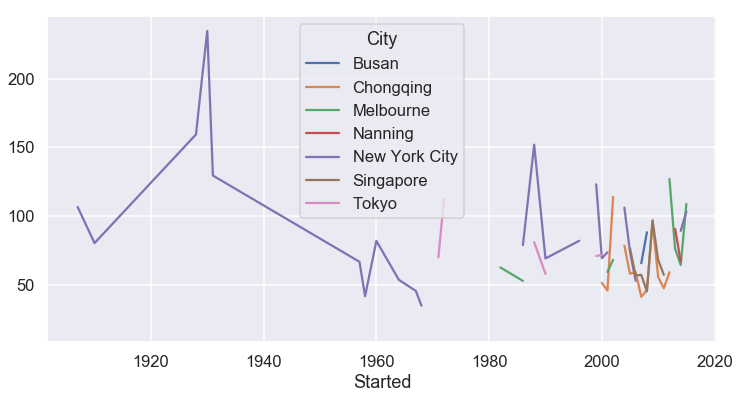

In [214]:
cities = [
    "Busan",
    "New York City",
    "Singapore",
    "Melbourne",
    "Nanning",
    "Chongqing",
    "Tokyo",
]
d = (
    t.query("Broad=='No'")
    .query("City in @cities")
    .groupby(["City", "Started"])
    .HPY.mean()
    .unstack(level=0)
)
d.plot(figsize=(12, 6))

Text(0,0.5,'Metres per year')

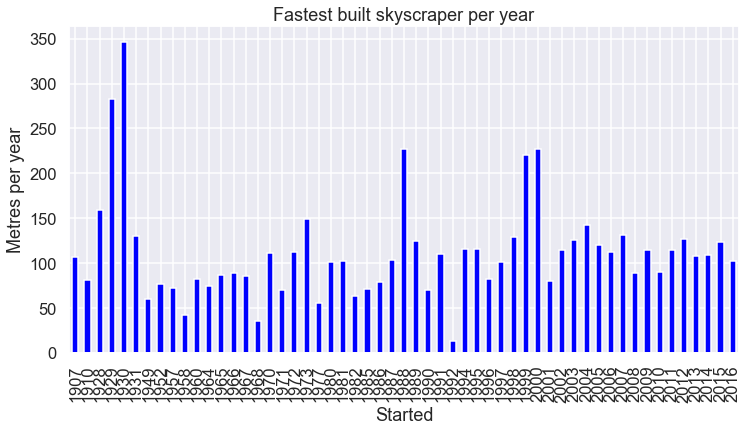

In [215]:
def tallest(g):
    return g.sort_values("HPY").assign(number=lambda x: len(x)).tail(1)


(
    t.query("City not in ['Changsha','Pyongyang']")
    .groupby("Started")
    .apply(tallest)
    .reset_index(drop=True)
    .sort_values("HPY", ascending=False)
    .set_index("Started")
    .HPY.sort_values(ascending=True)
    .sort_index()
    .plot.bar(color="blue", figsize=(12, 6))
)
plt.title("Fastest built skyscraper per year")
plt.ylabel("Metres per year")